<a href="https://www.pieriandata.com"><img src="https://github.com/rjboyd00/TF2_tutorials/blob/master/Pierian_Data_Logo.PNG?raw=1"></a>
<strong><center>Copyright by Pierian Data Inc.</center></strong> 
<strong><center>Created by Jose Marcial Portilla.</center></strong>

# Keras API Project Exercise

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club

## NOTE: Do not download the full zip from the link! We provide a special version of this file that has some extra feature engineering for you to do. You won't be able to follow along with the original file!

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

### Data Overview

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Starter Code

#### Note: We also provide feature information on the data as a .csv file for easy lookup throughout the notebook:

In [0]:
import pandas as pd

In [0]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [5]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [0]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [7]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [0]:
df = pd.read_csv('lending_club_loan_two.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16545 entries, 0 to 16544
Data columns (total 27 columns):
loan_amnt               16545 non-null float64
term                    16545 non-null object
int_rate                16545 non-null float64
installment             16545 non-null float64
grade                   16545 non-null object
sub_grade               16545 non-null object
emp_title               15596 non-null object
emp_length              15779 non-null object
home_ownership          16545 non-null object
annual_inc              16545 non-null float64
verification_status     16545 non-null object
issue_d                 16545 non-null object
loan_status             16545 non-null object
purpose                 16545 non-null object
title                   16480 non-null object
dti                     16545 non-null float64
earliest_cr_line        16545 non-null object
open_acc                16545 non-null float64
pub_rec                 16545 non-null float64
revol_bal 

# Project Tasks

**Complete the tasks below! Keep in mind is usually more than one way to complete the task! Enjoy**

-----
------

# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

**TASK: Since we will be attempting to predict loan_status, create a countplot as shown below.**

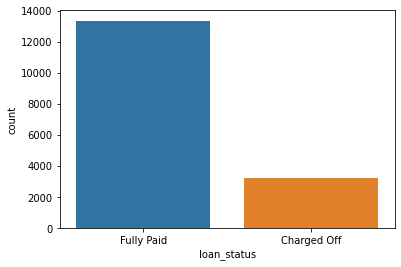

In [11]:
sns.countplot(x='loan_status',data=df)

**TASK: Create a histogram of the loan_amnt column.**

(0.0, 45000.0)

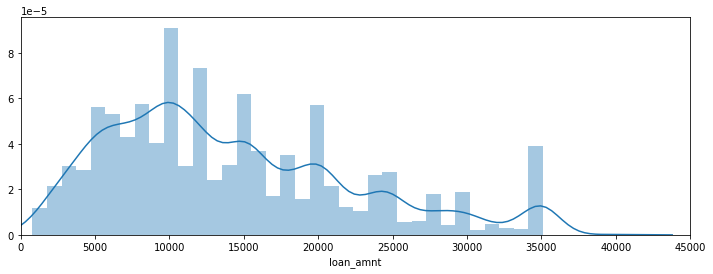

In [12]:
plt.figure(figsize=(12,4))
sns.distplot(df['loan_amnt'],kde=True,bins=40)
plt.xlim(0,45000)

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [13]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.177214,0.954068,0.293001,0.040673,0.179520,-0.067816,0.342208,0.096102,0.209362,0.224530,-0.097949
int_rate,0.177214,1.000000,0.170350,-0.047594,0.187074,0.011945,0.068325,-0.010356,0.303757,-0.039375,-0.086626,0.070359
installment,0.954068,0.170350,1.000000,0.288565,0.035383,0.170591,-0.054063,0.327576,0.117889,0.188659,0.197572,-0.086753
annual_inc,0.293001,-0.047594,0.288565,1.000000,-0.167133,0.106877,-0.012213,0.263760,0.037013,0.161588,0.209287,-0.041054
dti,0.040673,0.187074,0.035383,-0.167133,1.000000,0.304140,-0.038716,0.145599,0.181311,0.225255,-0.051736,-0.029651
open_acc,0.179520,0.011945,0.170591,0.106877,0.304140,1.000000,-0.015421,0.228664,-0.139995,0.676309,0.111558,-0.029847
pub_rec,-0.067816,0.068325,-0.054063,-0.012213,-0.038716,-0.015421,1.000000,-0.119354,-0.090701,0.019716,0.007447,0.706702
revol_bal,0.342208,-0.010356,0.327576,0.263760,0.145599,0.228664,-0.119354,1.000000,0.250300,0.202056,0.215618,-0.136744
revol_util,0.096102,0.303757,0.117889,0.037013,0.181311,-0.139995,-0.090701,0.250300,1.000000,-0.108091,0.011303,-0.091761
total_acc,0.209362,-0.039375,0.188659,0.161588,0.225255,0.676309,0.019716,0.202056,-0.108091,1.000000,0.383944,0.039684


**TASK: Visualize this using a heatmap. Depending on your version of matplotlib, you may need to manually adjust the heatmap.**

* [Heatmap info](https://seaborn.pydata.org/generated/seaborn.heatmap.html#seaborn.heatmap)
* [Help with resizing](https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot)

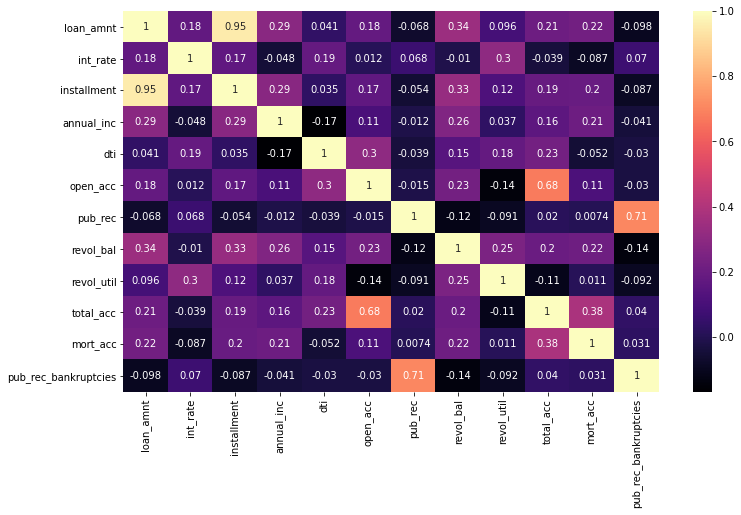

In [14]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='magma')
#plt.ylim(10, 0)

**TASK: You should have noticed almost perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them. Does this relationship make sense to you? Do you think there is duplicate information here?**

In [15]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [16]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


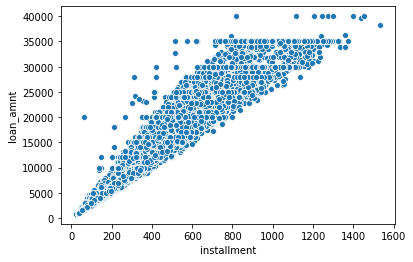

In [17]:
sns.scatterplot(x='installment',y='loan_amnt',data=df,)

**TASK: Create a boxplot showing the relationship between the loan_status and the Loan Amount.**

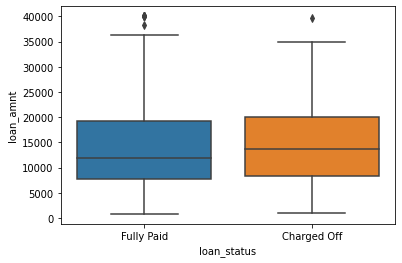

In [18]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

**TASK: Calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [19]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,3208.0,15070.986596,8454.015688,1000.0,8400.0,13737.5,20000.0,39700.0
Fully Paid,13337.0,13872.516308,8285.208301,800.0,7750.0,12000.0,19200.0,40000.0


**TASK: Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [20]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [21]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

**TASK: Create a countplot per grade. Set the hue to the loan_status label.**

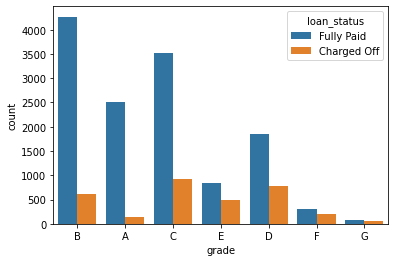

In [22]:
sns.countplot(x='grade',data=df,hue='loan_status')

**TASK: Display a count plot per subgrade. You may need to resize for this plot and [reorder](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot) the x axis. Feel free to edit the color palette. Explore both all loans made per subgrade as well being separated based on the loan_status. After creating this plot, go ahead and create a similar plot, but set hue="loan_status"**

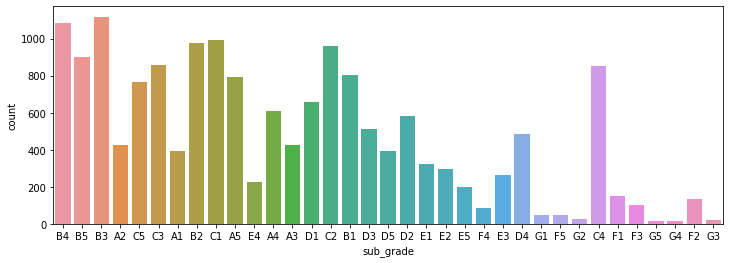

In [23]:
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',data=df)

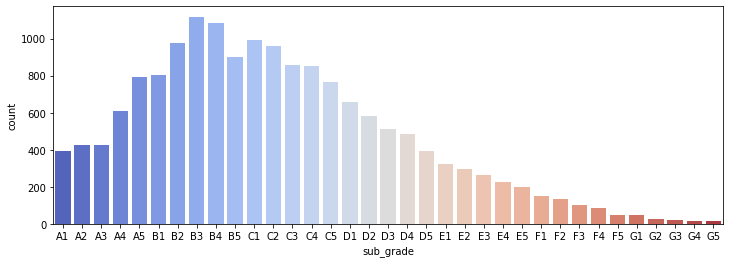

In [24]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' )

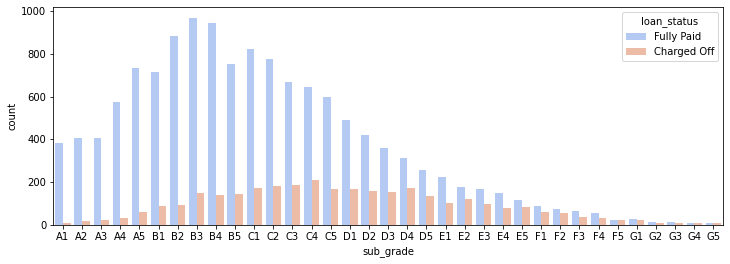

In [25]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,palette='coolwarm' ,hue='loan_status')

**TASK: It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.**

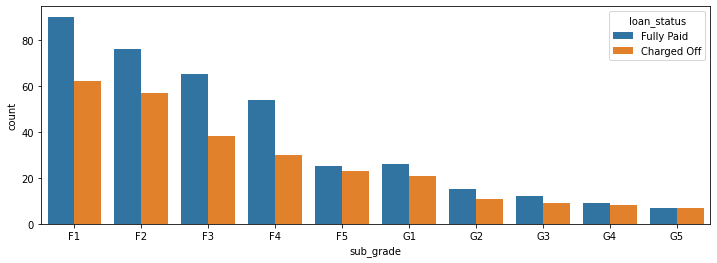

In [26]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order = subgrade_order,hue='loan_status')

**TASK: Create a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [27]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [0]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

**CHALLENGE TASK: (Note this is hard, but can be done in one line!) Create a bar plot showing the correlation of the numeric features to the new loan_repaid column. [Helpful Link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)**

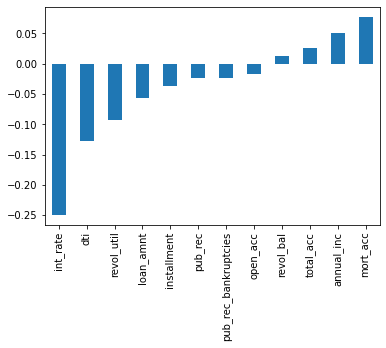

In [29]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

---
---
# Section 2: Data PreProcessing

**Section Goals: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



In [30]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16540,10000.0,36 months,15.22,347.74,C,C3,Plano indep. School District,5 years,RENT,40000.0,Not Verified,Aug-2013,Fully Paid,debt_consolidation,Debt pay off,4.41,Feb-1996,10.0,0.0,4915.0,39.6,26.0,f,INDIVIDUAL,3.0,0.0,93167 Montgomery Manor Suite 016\r\nEugenehave...,1
16541,15000.0,60 months,16.29,367.09,C,C4,Wyndham Worldwide,6 years,MORTGAGE,55000.0,Verified,Jun-2013,Fully Paid,debt_consolidation,Financial Options,15.43,Jan-2003,8.0,1.0,5058.0,54.4,11.0,f,INDIVIDUAL,1.0,1.0,USNV Edwards\r\nFPO AE 29597,1
16542,23000.0,60 months,24.99,674.95,E,E4,Server,10+ years,MORTGAGE,50000.0,Not Verified,Sep-2016,Fully Paid,debt_consolidation,Debt consolidation,32.41,Oct-2003,12.0,0.0,22507.0,67.8,20.0,f,INDIVIDUAL,2.0,0.0,"413 Miller Path Apt. 236\r\nNorth Sethshire, D...",1
16543,9600.0,36 months,16.29,338.89,D,D2,Programmer,< 1 year,RENT,80000.0,Not Verified,Jun-2014,Fully Paid,debt_consolidation,Debt consolidation,9.74,Dec-2006,6.0,0.0,12867.0,72.3,8.0,f,INDIVIDUAL,0.0,0.0,"3248 Cheryl Mount Apt. 481\r\nSouth Bethany, U...",1


# Missing Data

**Let's explore this missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**TASK: What is the length of the dataframe?**

In [31]:
len(df)

16545

**TASK: Create a Series that displays the total count of missing values per column.**

In [32]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                949
emp_length               766
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     65
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 9
total_acc                  0
initial_list_status        0
application_type           0
mort_acc                1519
pub_rec_bankruptcies      24
address                    1
loan_repaid                0
dtype: int64

**TASK: Convert this Series to be in term of percentage of the total DataFrame**

In [33]:
100* df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.735872
emp_length              4.629798
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.392868
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.054397
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.181021
pub_rec_bankruptcies    0.145059
address                 0.006044
loan_repaid             0.000000
dtype: float64

**TASK: Let's examine emp_title and emp_length to see whether it will be okay to drop them. Print out their feature information using the feat_info() function from the top of this notebook.**

In [34]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**TASK: How many unique employment job titles are there?**

In [0]:
# CODE HERE

In [36]:
df['emp_title'].nunique()

10888

In [37]:
df['emp_title'].value_counts()

Teacher                                175
Manager                                174
Supervisor                              87
RN                                      77
Registered Nurse                        74
                                      ... 
TIBCO                                    1
Product Designer                         1
ENGINEERING SERVICE REP.                 1
Certified Surgical Tech./Supervisor      1
Customer Services/Sales                  1
Name: emp_title, Length: 10888, dtype: int64

**TASK: Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [0]:
df = df.drop('emp_title',axis=1)

**TASK: Create a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [39]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [0]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

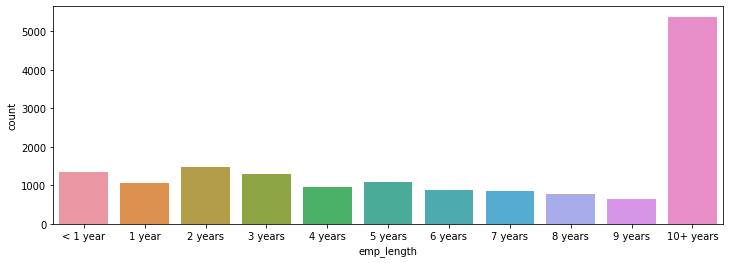

In [41]:
plt.figure(figsize=(12,4))

sns.countplot(x='emp_length',data=df,order=emp_length_order)

**TASK: Plot out the countplot with a hue separating Fully Paid vs Charged Off**

In [0]:
# CODE HERE

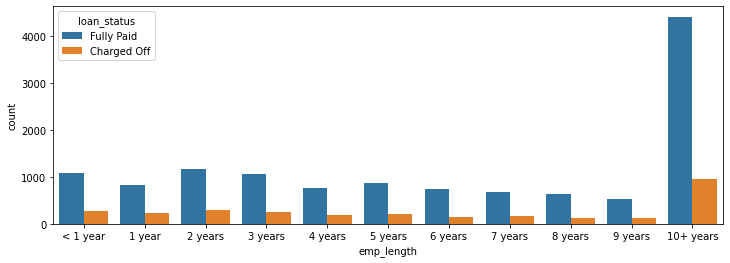

In [43]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

**CHALLENGE TASK: This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. There are a multitude of ways to create this Series. Once you've created it, see if visualize it with a [bar plot](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html). This may be tricky, refer to solutions if you get stuck on creating this Series.**

In [0]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']

In [0]:
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

In [0]:
emp_len = emp_co/emp_fp

In [47]:
emp_len

emp_length
1 year       0.282974
10+ years    0.217992
2 years      0.250847
3 years      0.232955
4 years      0.241830
5 years      0.243088
6 years      0.208731
7 years      0.256598
8 years      0.211838
9 years      0.255725
< 1 year     0.251625
Name: loan_status, dtype: float64

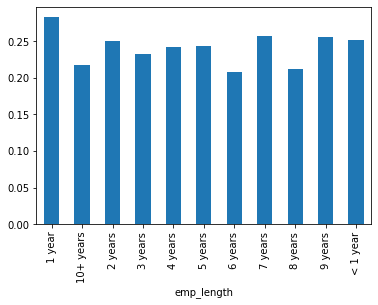

In [48]:
emp_len.plot(kind='bar')

**TASK: Charge off rates are extremely similar across all employment lengths. Go ahead and drop the emp_length column.**

In [0]:
df = df.drop('emp_length',axis=1)

**TASK: Revisit the DataFrame to see what feature columns still have missing data.**

In [50]:
df.isnull().sum()

loan_amnt                  0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
title                     65
dti                        0
earliest_cr_line           0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 9
total_acc                  0
initial_list_status        0
application_type           0
mort_acc                1519
pub_rec_bankruptcies      24
address                    1
loan_repaid                0
dtype: int64

**TASK: Review the title column vs the purpose column. Is this repeated information?**

In [51]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [52]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**TASK: The title column is simply a string subcategory/description of the purpose column. Go ahead and drop the title column.**

In [0]:
df = df.drop('title',axis=1)

---
**NOTE: This is one of the hardest parts of the project! Refer to the solutions video if you need guidance, feel free to fill or drop the missing values of the mort_acc however you see fit! Here we're going with a very specific approach.**


---
**TASK: Find out what the mort_acc feature represents**

In [54]:
feat_info('mort_acc')

Number of mortgage accounts.


In [55]:
feat_info('total_acc')

The total number of credit lines currently in the borrower's credit file


**TASK: Create a value_counts of the mort_acc column.**

In [56]:
df['mort_acc'].value_counts()

0.0     5939
1.0     2581
2.0     2092
3.0     1547
4.0     1131
5.0      729
6.0      496
7.0      238
8.0      139
9.0       68
10.0      33
12.0      12
11.0      11
13.0       3
14.0       2
34.0       1
25.0       1
22.0       1
19.0       1
15.0       1
Name: mort_acc, dtype: int64

**TASK: There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or you could even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

In [57]:
print("Correlation with the mort_acc column")
df.corr()['mort_acc'].sort_values()

Correlation with the mort_acc column


int_rate               -0.086626
dti                    -0.051736
pub_rec                 0.007447
revol_util              0.011303
pub_rec_bankruptcies    0.031174
loan_repaid             0.077185
open_acc                0.111558
installment             0.197572
annual_inc              0.209287
revol_bal               0.215618
loan_amnt               0.224530
total_acc               0.383944
mort_acc                1.000000
Name: mort_acc, dtype: float64

**TASK: Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [58]:
print("Mean of mort_acc column per total_acc")
df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0            NaN
3.0       0.000000
4.0       0.121212
5.0       0.102941
6.0       0.202128
           ...    
89.0     22.000000
97.0      5.000000
104.0     8.000000
105.0     6.000000
108.0     0.000000
Name: mort_acc, Length: 86, dtype: float64

**CHALLENGE TASK: Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns. Check out the link below for more info, or review the solutions video/notebook.**

[Helpful Link](https://stackoverflow.com/questions/13331698/how-to-apply-a-function-to-two-columns-of-pandas-dataframe) 

In [0]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [60]:
total_acc_avg[2.0]

nan

In [0]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [0]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [63]:
df.isnull().sum()

loan_amnt                0
term                     0
int_rate                 0
installment              0
grade                    0
sub_grade                0
home_ownership           0
annual_inc               0
verification_status      0
issue_d                  0
loan_status              0
purpose                  0
dti                      0
earliest_cr_line         0
open_acc                 0
pub_rec                  0
revol_bal                0
revol_util               9
total_acc                0
initial_list_status      0
application_type         0
mort_acc                 1
pub_rec_bankruptcies    24
address                  1
loan_repaid              0
dtype: int64

**TASK: revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go ahead and remove the rows that are missing those values in those columns with dropna().**

In [0]:
# CODE HERE

In [0]:
df = df.dropna()

In [66]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**TASK: List all the columns that are currently non-numeric. [Helpful Link](https://stackoverflow.com/questions/22470690/get-list-of-pandas-dataframe-columns-based-on-data-type)**

[Another very useful method call](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html)

In [67]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**TASK: Convert the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [68]:
df['term'].value_counts()

 36 months    12595
 60 months     3917
Name: term, dtype: int64

In [0]:
# May also just use .map()
# df['term'] = df['term'].map(term: int(term[:3])) # ??
df['term'] = df['term'].apply(lambda term: int(term[:3]))


### grade feature

**TASK: We already know grade is part of sub_grade, so just drop the grade feature.**

In [0]:
df = df.drop('grade',axis=1)

**TASK: Convert the subgrade into dummy variables. Then concatenate these new columns to the original dataframe. Remember to drop the original subgrade column and to add drop_first=True to your get_dummies call.**

In [71]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)
subgrade_dummies.head()

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [0]:
df = pd.concat([df.drop('sub_grade',axis=1), subgrade_dummies],axis=1)

In [74]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [75]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**TASK: Convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [76]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]])
dummies

,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,application_type_DIRECT_PAY,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_f,initial_list_status_w,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16539,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
16540,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
16541,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
16542,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [77]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [78]:
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)
df.select_dtypes(['object']).columns

Index(['home_ownership', 'issue_d', 'loan_status', 'earliest_cr_line',
       'address'],
      dtype='object')

### home_ownership
**TASK:Review the value_counts for the home_ownership column.**

In [79]:
df['home_ownership'].value_counts()

MORTGAGE    8196
RENT        6749
OWN         1562
OTHER          5
Name: home_ownership, dtype: int64

**TASK: Convert these to dummy variables, but [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe. Remember to set drop_first=True and to drop the original columns.**

In [0]:
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

In [0]:
dummies = pd.get_dummies(df['home_ownership'],drop_first=True) #drops "NONE", "ANY"
df = df.drop('home_ownership',axis=1) #drops all "home_ownership"
df = pd.concat([df,dummies],axis=1)
# if this is re-run the drop call will raise an error about not being able to find the already dropped stuff

In [82]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

### address
**TASK: Let's feature engineer a zip code column from the address in the data set. Create a column called 'zip_code' that extracts the zip code from the address column.**

In [0]:
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

**TASK: Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [0]:
dummies = pd.get_dummies(df['zip_code'], drop_first=True)
df = df.drop(['zip_code', 'address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [85]:
df.select_dtypes(['object']).columns

Index(['issue_d', 'loan_status', 'earliest_cr_line'], dtype='object')

### issue_d 

**TASK: This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [0]:
df = df.drop('issue_d',axis=1)

### earliest_cr_line
**TASK: This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [0]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [88]:
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

## Train Test Split

**TASK: Import train_test_split from sklearn.**

In [0]:
from sklearn.model_selection import train_test_split

**TASK: drop the load_status column we created earlier, since its a duplicate of the loan_repaid column. We'll use the loan_repaid column since its already in 0s and 1s.**

In [0]:
df = df.drop('loan_status',axis=1)

**TASK: Set X and y variables to the .values of the features and label.**

In [0]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

----
----

# OPTIONAL

## Grabbing a Sample for Training Time

### OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.

----
----

In [92]:
# df = df.sample(frac=0.1,random_state=101)
print(len(df))

16512


**TASK: Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

## Normalizing the Data

**TASK: Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
X_train = scaler.fit_transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

# Creating the Model

**TASK: Run the cell below to import the necessary Keras functions.**

In [98]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.constraints import max_norm

**TASK: Build a sequential model to will be trained on the data. You have unlimited options here, but here is what the solution uses: a model that goes 78 --> 39 --> 19--> 1 output neuron. OPTIONAL: Explore adding [Dropout layers](https://keras.io/layers/core/) [1](https://en.wikipedia.org/wiki/Dropout_(neural_networks)) [2](https://towardsdatascience.com/machine-learning-part-20-dropout-keras-layers-explained-8c9f6dc4c9ab)**

In [0]:
# CODE HERE
model = Sequential()

# Choose whatever number of layers/neurons you want.

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

# Remember to compile()

#input layer
model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

#hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

#hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

#output layer
model.add(Dense(units=1,activation='sigmoid'))

#compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

**TASK: Fit the model to the training data for at least 25 epochs. Also add in the validation data for later plotting. Optional: add in a batch_size of 256.**

In [100]:
model.fit(x=X_train,
          y=y_train,
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test),
          )

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 13209 samples, validate on 3303 samples
Epoch 1/25
13209/13209 [==============================] - 1s 66us/sample - loss: 0.5251 - val_loss: 0.4371
Epoch 2/25
13209/13209 [==============================] - 0s 16us/sample - loss: 0.4238 - val_loss: 0.3548
Epoch 3/25
13209/13209 [==============================] - 0s 15us/sample - loss: 0.3586 - val_loss: 0.3096
Epoch 4/25
13209/13209 [==============================] - 0s 15us/sample - loss: 0.3195 - val_loss: 0.2890
Epoch 5/25
13209/13209 [==============================] - 0s 15us/sample - loss: 0.2988 - val_loss: 0.2786
Epoch 6/25
13209/13209 [==============================] - 0s 16us/sample - loss: 0.2855 - val_loss: 0.2760
Epoch 7/25
13209/13209 [==============================] - 0s 14us/sample - loss: 0.2782 - val_loss: 0.2730
Epoch 8/25
13209/13209 [===

**TASK: OPTIONAL: Save your model.**

In [0]:
from tensorflow.keras.models import load_model

In [0]:
model.save('full_date_project_model.h5')

# Section 3: Evaluating Model Performance.

**TASK: Plot out the validation loss versus the training loss.**

In [0]:
losses = pd.DataFrame(model.history.history)

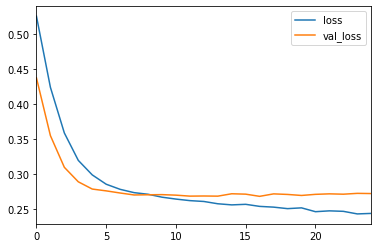

In [104]:
losses[['loss','val_loss']].plot()

**TASK: Create predictions from the X_test set and display a classification report and confusion matrix for the X_test set.**

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [0]:
predictions = model.predict_classes(X_test)

In [107]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.45      0.61       625
           1       0.89      0.99      0.94      2678

    accuracy                           0.89      3303
   macro avg       0.91      0.72      0.77      3303
weighted avg       0.90      0.89      0.87      3303



In [108]:
confusion_matrix(y_test,predictions)

array([[ 280,  345],
       [  18, 2660]])

**TASK: Given the customer below, would you offer this person a loan?**

In [109]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt            18150.00
term                    60.00
int_rate                13.11
installment            414.00
annual_inc          175000.00
                      ...    
48052                    0.00
70466                    0.00
86630                    0.00
93700                    0.00
earliest_cr_year      2001.00
Name: 6390, Length: 82, dtype: float64

In [110]:
new_customer.values

array([1.8150e+04, 6.0000e+01, 1.3110e+01, 4.1400e+02, 1.7500e+05,
       9.5600e+00, 1.8000e+01, 0.0000e+00, 9.6385e+04, 5.3400e+01,
       2.4000e+01, 6.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e

In [111]:
new_customer.values.reshape(1,82)

array([[1.8150e+04, 6.0000e+01, 1.3110e+01, 4.1400e+02, 1.7500e+05,
        9.5600e+00, 1.8000e+01, 0.0000e+00, 9.6385e+04, 5.3400e+01,
        2.4000e+01, 6.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.00

In [114]:
model.predict_classes(new_customer.values.reshape(1,82))

array([[1]], dtype=int32)

**TASK: Now check, did this person actually end up paying back their loan?**

In [115]:
df.iloc[random_ind]['loan_repaid']

1.0

# GREAT JOB!